<a href="https://colab.research.google.com/github/EmmanuelABonsu/CE888/blob/main/src/project/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix

In [4]:
model = keras.models.load_model('drive/MyDrive/trained_model/fire_dection_model_run_April_14')

In [5]:
test_path = "drive/MyDrive/CE888_data/Test"

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(254, 254),
        shuffle = False,
        class_mode='binary',
        batch_size=32)

Found 8617 images belonging to 2 classes.


In [14]:
score = model.evaluate(test_generator,               
                                  max_queue_size=10,                 
                                  workers=0,                         
                                  use_multiprocessing=False,         
                                  verbose=0)
print("loss: %.3f - acc: %.3f" % (score[0], score[1]))


loss: 1.005 - acc: 0.747


In [8]:
predictions = model.predict(test_generator,
                                    max_queue_size=10,
                                    workers=0,
                                    use_multiprocessing=False,
                                    verbose=0)

# Evaluate predictions
predictedClass = np.argmax(predictions, axis=1)
trueClass = test_generator.classes[test_generator.index_array]
classLabels = list(test_generator.class_indices.keys())

# Create confusion matrix
confusionMatrix = (confusion_matrix(
  y_true=trueClass,                                       
  y_pred=predictedClass))                                 
print(confusionMatrix)

[[5137    0]
 [3480    0]]


In [16]:
# taking first batch from the generator 
img, label = test_generator[0] 

# Predicting the images from the first batch 
pred = np.round(model.predict(img)).flatten()

In [17]:
len(img)


32

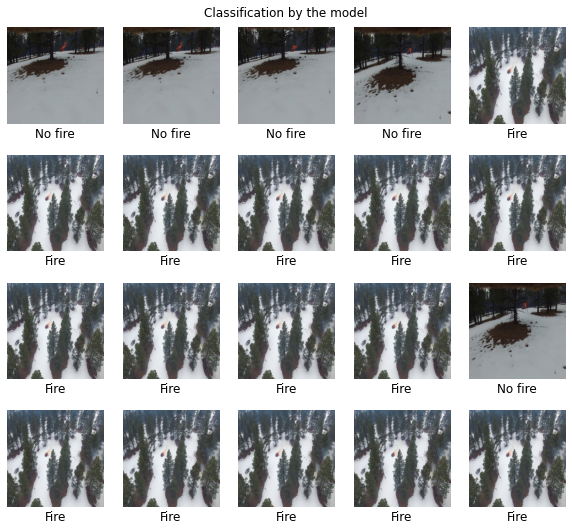

In [19]:
import matplotlib.pyplot as plt

# Numeric to semantic labels 
label_dict = {1.0: 'No fire', 0.0: 'Fire'}

# Generating collage of plots 
fig = plt.figure(figsize=(10, 9))
plt.title('Classification by the model')
plt.axis('off')

for i, img_i in enumerate(img[:20]):
    ax = fig.add_subplot(4, 5, i+1)
    plt.axis('off')
    plt.title(label_dict[pred[i]], y=-0.2)
    ax.imshow(img_i)

In [20]:
# Lists for missed fire images and missed non-fire images
msd_fire = []
msd_nofire = []

# Iterating through all the batches 
for j in range(31):
    img, label = test_generator[j] 
    pred = np.round(model.predict(img)).flatten()
    bool_list = label == pred

    # bool_list is False when there is misclassification 
    for i, e in enumerate(bool_list):
        if e == False:
            
            # separating labels (fire and non-fire)
            if label[i] == 0:
                msd_fire.append(img[i])
            else:
                msd_nofire.append(img[i])

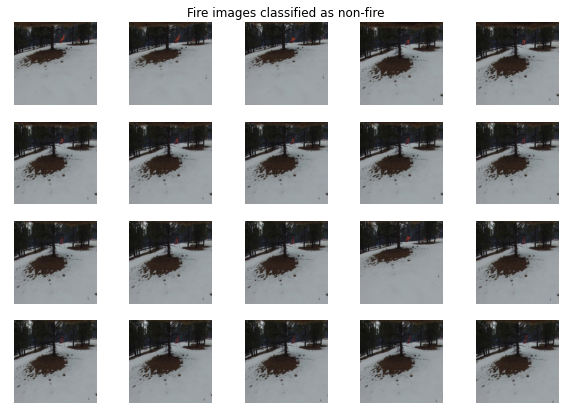

In [25]:
fig = plt.figure(figsize=(10, 7))
plt.title('Fire images classified as non-fire')
plt.axis('off')
for i, img_i in enumerate(msd_fire): 
    if i >= 20:
      break       
    ax = fig.add_subplot(4, 5, i+1)
    ax.imshow(img_i)
    ax.axis('off')

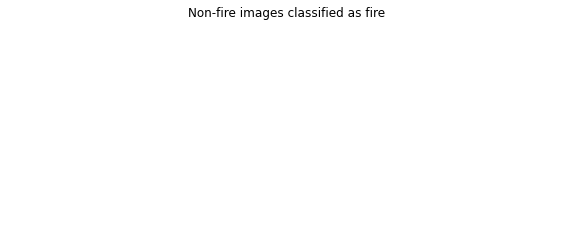

In [27]:
fig = plt.figure(figsize=(10, 4))
plt.title('Non-fire images classified as fire')
plt.axis('off')
for i, img_i in enumerate(msd_nofire): 
    # if i >= 20:
    #   break        
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(img_i)
    ax.axis('off')